# 根据方差筛选背景

## 筛选标准

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

def calculate_image_variance(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image)
    variance = gray_image.var()
    return variance

606.6791774729993

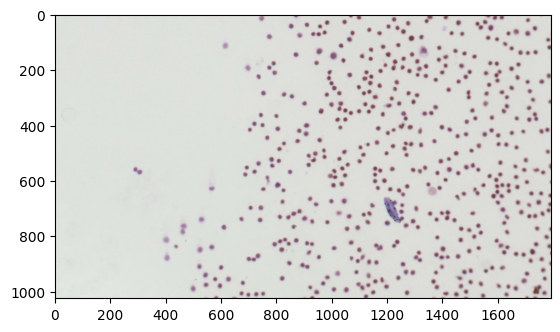

In [15]:
calculate_image_variance("/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM/F12/1_16.jpg")

44.025967354966724

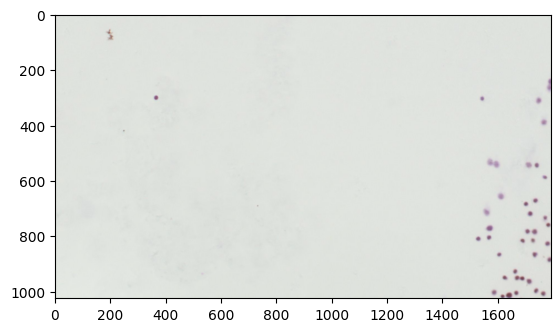

In [16]:
calculate_image_variance("/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM/F12/1_13.jpg")

3.6126009041944784

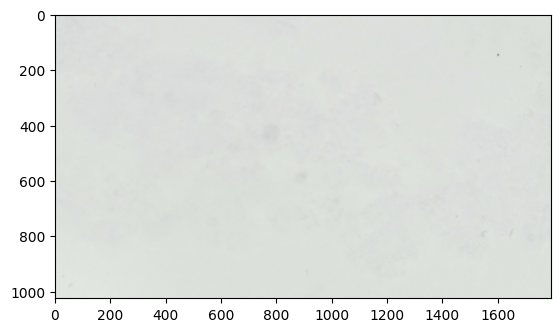

In [17]:
calculate_image_variance("/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM/F12/2_4.jpg")

181.39091461972444

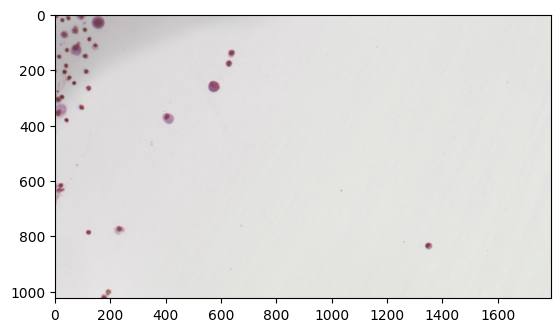

In [8]:
calculate_image_variance("/root/commonfile/TCT-NGC-2023/filter-data/Unannotated_KSJ/Unannotated-KSJ-TCTNGC-NILM/F56/23_31.jpg")


## 将筛选出的图片保存到另一个路径中

In [2]:
import cv2
import os
import shutil
from tqdm import tqdm

def calculate_image_variance(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = gray_image.var()
    return variance
import os
import shutil
from tqdm import tqdm
import multiprocessing

def process_image_groups(sub_sub_dir, image_files, output_path, threshold, par_dir):
    """处理图片子集"""
    for file in image_files:
        if os.path.splitext(file)[1].lower() in ['.jpg', '.png', '.gif']:
            img_path = os.path.join(sub_sub_dir, file)
            process_image(img_path, output_path, threshold, par_dir)
            

def process_image(img_path, output_path, threshold, par_dir):
    """处理一张图片"""
    variance = calculate_image_variance(img_path)
    if variance > threshold:
        image_dir = os.path.relpath(os.path.join(os.path.dirname(img_path), os.path.basename(img_path)), par_dir)
        tmp_output_path = os.path.dirname(os.path.join(output_path, image_dir))
        os.makedirs(tmp_output_path, exist_ok=True)
        shutil.copy(img_path, tmp_output_path)

def filter_non_background_images(folder_path, output_path, threshold):
    """主函数"""
    par_dir = os.path.dirname(folder_path)
    sub_dirs = os.listdir(folder_path)
    # 进程数为16或者最大进程数
    num_processes = min(16, multiprocessing.cpu_count())

    for sub_dir in sub_dirs:
        sub_dir = os.path.join(folder_path, sub_dir)
        sub_sub_dirs = os.listdir(sub_dir)
        for sub_sub_dir in tqdm(sub_sub_dirs):
            sub_sub_dir = os.path.join(sub_dir, sub_sub_dir)
            if not os.path.isdir(sub_sub_dir):
                continue
            
            # 使用异步执行 一个进程处理一个wsi的图片子集
            pool = multiprocessing.Pool(processes=num_processes)
            image_files = os.listdir(sub_sub_dir)
            chunk_size = len(image_files) // num_processes
            for i in range(num_processes):
                start = i * chunk_size
                end = (i + 1) * chunk_size if i < num_processes - 1 else len(image_files)
                pool.apply_async(process_image_groups, args=(sub_sub_dir, image_files[start:end], output_path, threshold, par_dir))

            pool.close()
            pool.join()



In [4]:
filter_non_background_images("/root/commonfile/TCT-NGC-2023/base-data/Unannotated_KSJ", "/root/commonfile/TCT-NGC-2023/filter-data", 200)


100%|██████████| 175/175 [12:16<00:00,  4.21s/it]


In [5]:
filter_non_background_images("/root/commonfile/TCT-NGC-2023/base-data/Unannotated_XIMEA", "/root/commonfile/TCT-NGC-2023/filter-data", 200)


100%|██████████| 324/324 [1:03:18<00:00, 11.72s/it]
